# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

## Решение

In [3]:
# a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого 
#    (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

import numpy 
from sklearn.metrics import pairwise_distances

def print_simular_users():
    distances_matrix = pairwise_distances(raitings, metric='cosine')

    print('Матрица с дистанциями.')
    print('Чем ближе к нулю, тем пользоваетль более похож на пользоваетля с нулевым значением')
    print()
    print(distances_matrix)
    print()
          
    for line_index in range(len(distances_matrix)):
        user_x_index = 0
        user_similar_index = 0
        distance_min = numpy.finfo(numpy.float64).max
    
        for user_index in range(len(distances_matrix[line_index])):
            # получаем дистанцию пользователя
            user_distance = distances_matrix[line_index][user_index]
       
            # пользователь с дистанцией 0 это пользователь от которого дистанцию считают
            if user_distance == 0:
                user_x_index = user_index
                
            # ищем минимальную дистанцию
            elif user_distance < distance_min:
                distance_min = user_distance
                user_similar_index = user_index
        
        print('Пользователь c индексом {}, похож на пользователя c индексом {}'.format(user_x_index, user_similar_index))
                
print_simular_users()



Матрица с дистанциями.
Чем ближе к нулю, тем пользоваетль более похож на пользоваетля с нулевым значением

[[0.         0.17397081 0.15078471 0.21659884 0.18082368 0.25881452
  0.27264172 0.19032478 0.08934018 0.13989224]
 [0.17397081 0.         0.18765675 0.15364663 0.12861948 0.17286893
  0.17370316 0.19973997 0.17473692 0.18031873]
 [0.15078471 0.18765675 0.         0.15330626 0.21605701 0.20902015
  0.32383777 0.23710448 0.17887923 0.08126949]
 [0.21659884 0.15364663 0.15330626 0.         0.30846591 0.21334208
  0.16725789 0.17065333 0.2229334  0.1411313 ]
 [0.18082368 0.12861948 0.21605701 0.30846591 0.         0.2235566
  0.21799532 0.18763131 0.12051523 0.15425211]
 [0.25881452 0.17286893 0.20902015 0.21334208 0.2235566  0.
  0.25988199 0.15548315 0.19377124 0.14485092]
 [0.27264172 0.17370316 0.32383777 0.16725789 0.21799532 0.25988199
  0.         0.17330826 0.18869956 0.20845282]
 [0.19032478 0.19973997 0.23710448 0.17065333 0.18763131 0.15548315
  0.17330826 0.         0.201

In [4]:
# b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

import numpy
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

def print_reduced_ratings(raitings):
    pca = PCA(n_components=5)
    raitings_reduced = pca.fit_transform(raitings)
    original_data = pca.inverse_transform(raitings_reduced)

    print('mse: ', mean_squared_error(raitings, original_data))
    print()
    print('Сжатые признаки:\n')
    print(raitings_reduced)
    
print_reduced_ratings(raitings)

mse:  1.2455442696728187

Сжатые признаки:

[[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


---

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

## Решение

In [5]:
import numpy
from scipy.optimize import approx_fprime

def task_2_func(x):
    return numpy.tan(numpy.sin(x) + numpy.cos(2 * x + 3)) ** 2

def print_diff():
    x = 1
    eps = numpy.sqrt(numpy.finfo(float).eps)
    
    print(approx_fprime(x, task_2_func, eps))
    
print_diff()

[55.38592404]


### Решение на бумаге

$𝑡𝑔2(𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3))$

$𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3) = z$

$f`(x) = 2tg(z) * (tg(z))'$

$f`(x) = 2tg(z) * z' * { 
    1
    \over 
    cos^2(z)
}$

$f`(x) = 2tg(𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3)) * (cos(x) - 2sin(2𝑥+3)) * { 
    1
    \over 
    cos^2(𝑠𝑖𝑛(𝑥)+𝑐𝑜𝑠(2𝑥+3))
}$

$f`(1) = 2tg(1.125133170271123) * 2.4581508551944165 * { 
    1
    \over 
    cos^2(1.125133170271123)
} = 4.186575559122887 * 2.4581508551944165 * { 
    1
    \over 
    0.18580958356150512
} = 10.291234290993968 * 5.381853728061278$

Ответ:

$f`(1) = 55.385917635337954$


---

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

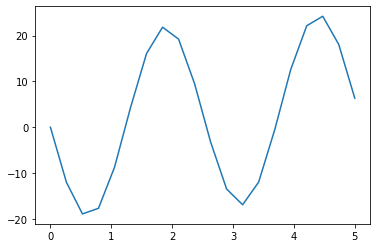

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

### Решение

In [11]:
import numpy
from matplotlib import pyplot
from scipy.optimize import differential_evolution

def func(x, a, b):
    return numpy.e ** a * numpy.sin(b * x) + x

def error(params, fx, x):
    return numpy.sum(numpy.abs(fx - func(x, params[0], params[1])))

def print_error_min():
    x = numpy.array([
        0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,          
        1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,          
        2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,          
        3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        
    ])
    fx = numpy.array([
          0.        , -12.01819092, -18.90968634, -17.68786571,
         -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
         19.22059845,   9.48411207,  -3.22273056, -13.48576488,
        -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
         22.12489421,  24.20292139,  18.04522521,   6.33211092
    ])
    
    bounds_min, bounds_max = -5, 5
    bounds = [(bounds_min, bounds_max), (bounds_min, bounds_max)]

    result = differential_evolution(
        error, 
        bounds, 
        args=(fx, x))
    
    print(result)
    
    print('\nВ точках: ', result.x)
    print('Минимальное количество ошибок: ', round(error(result.x, fx, x), 3))
    
print_error_min()

     fun: 1.5111690991886917e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

В точках:  [ 3.  -2.5]
Минимальное количество ошибок:  0.0


---

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

### Решение

[89 49 16 84 50 61 86 16 78 57 35 43 89  6 15 28 87 66 71 27]




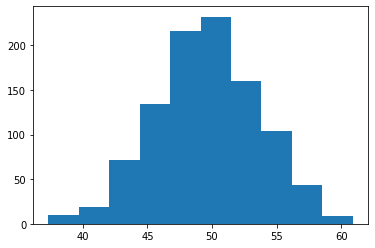

In [12]:
import numpy
from matplotlib import pyplot

def show_ten_random_numbers():
    print(numpy.random.randint(
        low=0,
        high=100,
        size=20))

def show_random_numbers():
    total_numbers = []
    
    for step in range(1000):
        numbers = numpy.random.randint(
            low=0,
            high=100,
            size=50)
        total_numbers.append(numbers.mean())
        
    pyplot.hist(total_numbers)
    pyplot.show()
    
    
show_ten_random_numbers()
print('\n')
show_random_numbers()

---

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



### Решение

In [13]:
import numpy

def print_eigenvalues_eigenvectors_matrix():
    matrix = numpy.array([[1, 4],
                          [1, 1]])
    
    eigenvalues, eigenvectors =  numpy.linalg.eig(matrix)

    for index in range(len(eigenvalues)):
        print("Eigenvalue - {0:.2f}".format(eigenvalues[index]))
        print("Eigenvector - {}".format(eigenvectors[:,index]))
        print()


print_eigenvalues_eigenvectors_matrix()

Eigenvalue - 3.00
Eigenvector - [0.89442719 0.4472136 ]

Eigenvalue - -1.00
Eigenvector - [-0.89442719  0.4472136 ]



### Решение на бумаге

$\begin{bmatrix}
    1 & 4\\
    1 & 1
 \end{bmatrix} \begin{bmatrix}x\\y\end{bmatrix} = λ \begin{bmatrix}x\\y\end{bmatrix}$ 

$\begin{bmatrix}
    1 * x & 4 * y\\
    1 * x & 1 * y
 \end{bmatrix} = \begin{bmatrix}x & 4y\\x & y\end{bmatrix} = \begin{bmatrix}λx\\λy\end{bmatrix}$ 

$\begin{equation}
\left\{ 
  \begin{aligned}
    x + 4y = λx\\
    x + y = λy\\
  \end{aligned}
  \right.
\end{equation}$

$\begin{equation}
\left\{ 
  \begin{aligned}
    x + 4y - λx = 0\\
    x + y - λy = 0\\
  \end{aligned}
  \right.
\end{equation}$

$\begin{equation}
\left\{ 
  \begin{aligned}
    (1 - λ)x + 4y = 0\\
    x + (1 - λ)y = 0\\
  \end{aligned}
  \right.
\end{equation}$

$\begin{bmatrix}1 - λ & 4\\1 & 1 - λ\end{bmatrix} = 0$

$(1 - λ)*(1 - λ) - 4 * 1 = 0$

$λ^2 - 2λ - 3 = 0$

Квадратное уравнение: $ax^2+bx+c=0$ рещается через $D=b^2-4ac$

$D = 2^2 - 4 * -3 = 16$

Cобственные значения:

$λ1 = (2 - 4) / 2 = -1$

$λ2 = (2 + 4) / 2 = 3$

---

собственный вектор λ1:

$\begin{bmatrix}
    1 - λ & 4\\
    1 & 1 - λ
\end{bmatrix} = 0$ 

$λ1 = -1$

$\begin{bmatrix}
    2 & 4\\
    1 & 2
\end{bmatrix} = 0$ 

$\begin{equation}
\left\{ 
  \begin{aligned}
    2x + 4y = 0\\
    x + 2y = 0\\
  \end{aligned}
  \right.
\end{equation}$

x = 2, y = -1

$\begin{bmatrix}
    2\\
    -1
\end{bmatrix}$


собственный вектор λ2:

$λ2 = 3$

$\begin{bmatrix}
    -2 & 4\\
    1 & -2
\end{bmatrix} = 0$ 

$\begin{equation}
\left\{ 
  \begin{aligned}
    -2x + 4y = 0\\
    x - 2y = 0\\
  \end{aligned}
  \right.
\end{equation}$

x = 2, y = -1

$\begin{bmatrix}
    2\\
    -1
\end{bmatrix}$